In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from warnings import simplefilter

simplefilter(action='ignore' , category=FutureWarning)

sns.set_style('dark')

In [6]:
df_raw = pd.read_csv('/home/erickfog/Study_Data_Science/data_creditfraud/creditcard.csv')

In [8]:
# Visualizar as 5 primeiras entradas
df_raw.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [10]:
df_raw.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [11]:
(df_raw.isnull().sum() / df_raw.shape[0]).sort_values(ascending=False)

Time      0.0
V16       0.0
Amount    0.0
V28       0.0
V27       0.0
V26       0.0
V25       0.0
V24       0.0
V23       0.0
V22       0.0
V21       0.0
V20       0.0
V19       0.0
V18       0.0
V17       0.0
V15       0.0
V1        0.0
V14       0.0
V13       0.0
V12       0.0
V11       0.0
V10       0.0
V9        0.0
V8        0.0
V7        0.0
V6        0.0
V5        0.0
V4        0.0
V3        0.0
V2        0.0
Class     0.0
dtype: float64

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



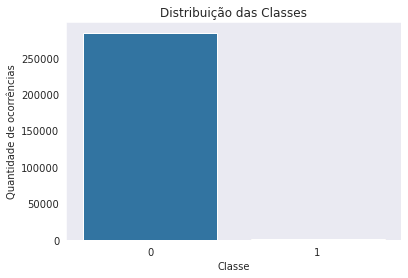

In [14]:
# Checar o balanceamento das classes
print(df_raw.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df_raw[df_raw.Class == 1].shape[0] / df_raw.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
fig , ax = plt.subplots()
sns.countplot('Class', data=df_raw, ax=ax);
ax.set_title('Distribuição das Classes')
ax.set_ylabel('Quantidade de ocorrências')
ax.set_xlabel('Classe')
plt.show();

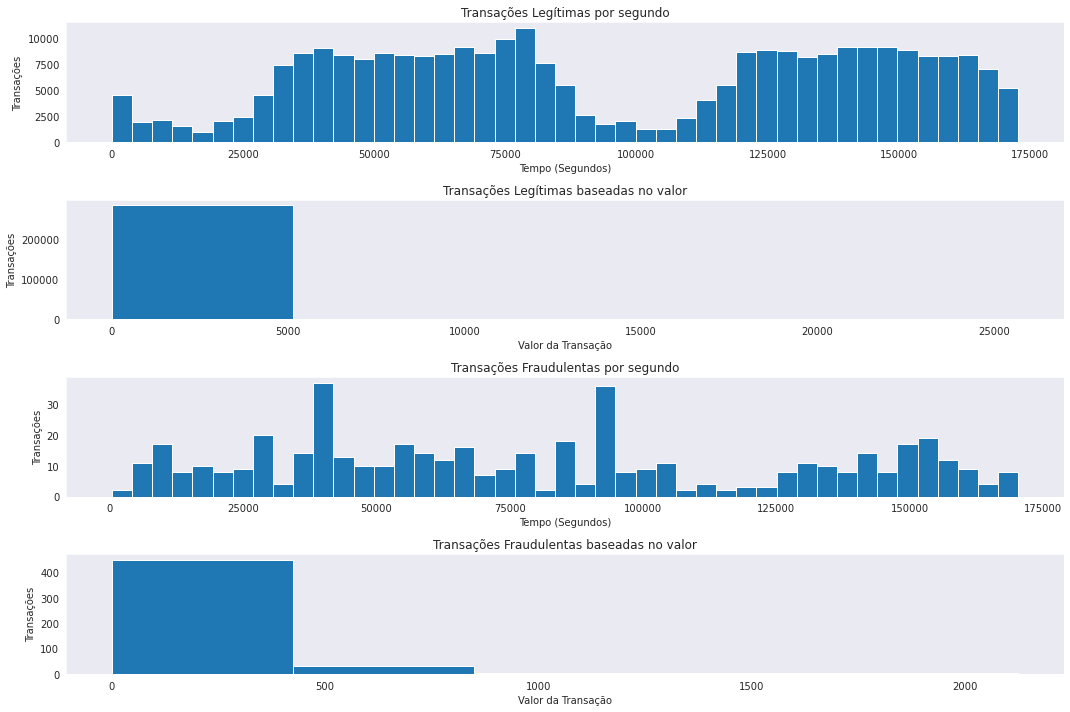

In [16]:
# Plotar gráfico 
fig, ax = plt.subplots(nrows=4, ncols=1, figsize=(15,10))

# Definir número de barras dos gráficos
num_bins_time = 45
num_bins_amount = 5

# Gráfico 1
ax[0].hist(df_raw.Time[df_raw.Class == 0], bins=num_bins_time)
ax[0].set_title('Transações Legítimas por segundo')
ax[0].set_ylabel('Transações')
ax[0].set_xlabel('Tempo (Segundos)')

# Gráfico 2
ax[1].hist(df_raw.Amount[df_raw.Class == 0], bins=num_bins_amount)
ax[1].set_title('Transações Legítimas baseadas no valor')
ax[1].set_ylabel('Transações')
ax[1].set_xlabel('Valor da Transação')

# Gráfico 3
ax[2].hist(df_raw.Time[df_raw.Class == 1], bins=num_bins_time)
ax[2].set_title('Transações Fraudulentas por segundo')
ax[2].set_ylabel('Transações')
ax[2].set_xlabel('Tempo (Segundos)')

# Gráfico 4
ax[3].hist(df_raw.Amount[df_raw.Class == 1], bins=num_bins_amount)
ax[3].set_title('Transações Fraudulentas baseadas no valor')
ax[3].set_ylabel('Transações')
ax[3].set_xlabel('Valor da Transação')

# Mostrar gráficos
plt.tight_layout();

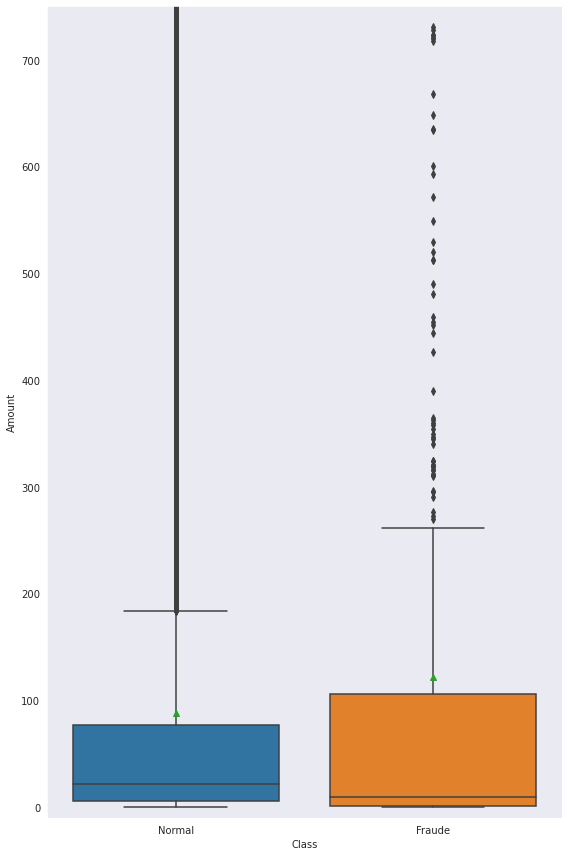

In [18]:
# Plotar Boxplot
fig , ax = plt.subplots(figsize=(8, 12), sharex=True)
sns.boxplot(df_raw.Class, df_raw.Amount, showmeans=True, ax=ax, orient='v')

# Definir limites
plt.ylim((-10, 750))
plt.xticks([0, 1],['Normal', 'Fraude'])

# Mostrar Boxplot
plt.tight_layout();

In [19]:
# Importar pacotes nescessários do Scikit-Learn para preparar os dados
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [20]:
# Criar cópia do DataFrame 
df_clean = df_raw.copy()

# Padronizar as colunas Time e Amount
scaler = StandardScaler()
df_clean['Scaler_amount'] = scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['Scaler_time'] = scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

# Ver as primeiras entradas
df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,Scaler_amount,Scaler_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964,-1.996583
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475,-1.996583
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686,-1.996562
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534,-1.996562
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403,-1.996541


In [21]:
# Separar os dados entre feature matrix e target vector 
X = df_clean.drop('Class', axis=1)
y = df_clean['Class']

# Dividir o dataset entre treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, shuffle=True)

0    369
1    369
Name: Class, dtype: int64


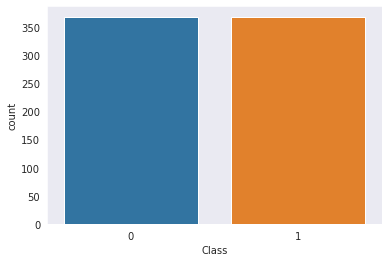

In [23]:
# Balanceamento dos dados
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler()
X_rus, y_rus = rus.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_rus).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_rus);


0    213236
1    213236
Name: Class, dtype: int64


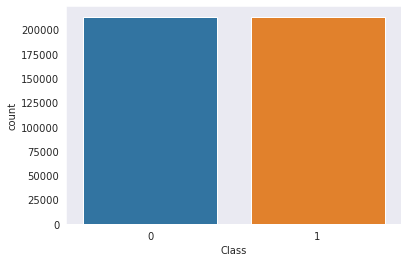

In [24]:
# Balanceamento dos dados
from imblearn.over_sampling import SMOTE
smo = SMOTE()
X_smo, y_smo = smo.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_smo).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_smo);

1    213252
0    213236
Name: Class, dtype: int64


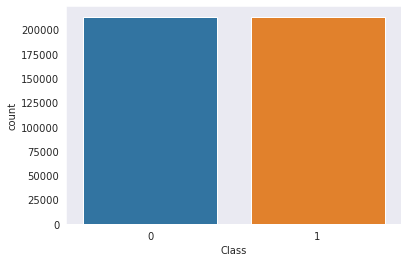

In [25]:

# Balanceamento dos dados
from imblearn.over_sampling import ADASYN
ada = ADASYN()
X_ada, y_ada = ada.fit_resample(X_train, y_train)

# Checar o balanceamento das classes
print(pd.Series(y_ada).value_counts())

# Plotar a nova distribuição de Classes
sns.countplot(y_ada);

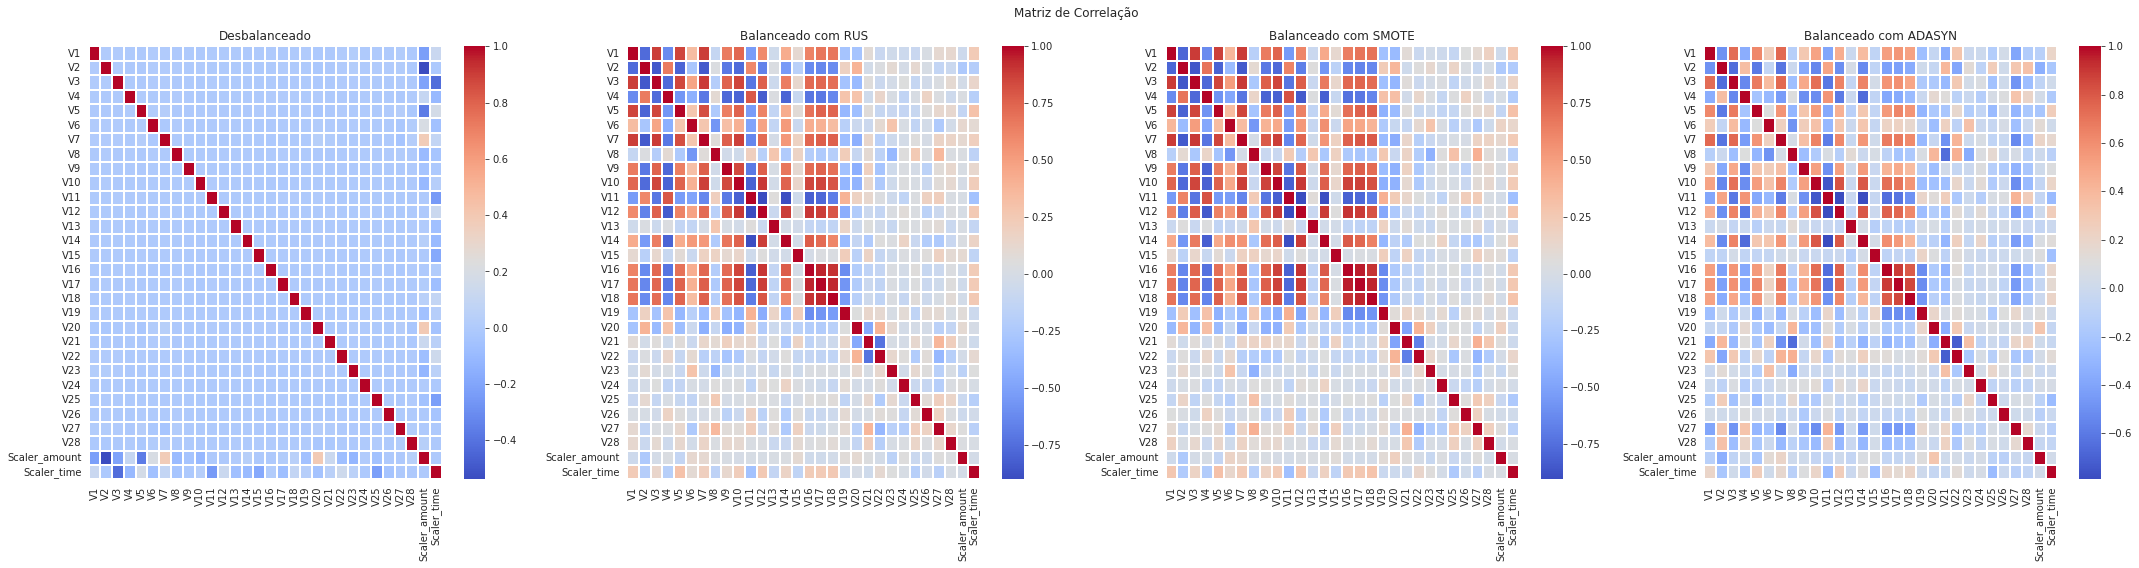

In [26]:
# plotar a matriz de correlação
corr = X_train.corr()
corr_rus = pd.DataFrame(X_rus).corr()
corr_smo = pd.DataFrame(X_smo).corr()
corr_ada = pd.DataFrame(X_ada).corr()

fig, ax = plt.subplots(nrows=1, ncols=4, figsize = (30,8))
fig.suptitle('Matriz de Correlação')

sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[0])
ax[0].set_title('Desbalanceado')

sns.heatmap(corr_rus, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[1])
ax[1].set_title('Balanceado com RUS')

sns.heatmap(corr_smo, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[2])
ax[2].set_title('Balanceado com SMOTE')

sns.heatmap(corr_ada, xticklabels=corr.columns, yticklabels=corr.columns,
            linewidths=.1, cmap="coolwarm", ax=ax[3])
ax[3].set_title('Balanceado com ADASYN')

plt.tight_layout()

0    284315
1       492
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



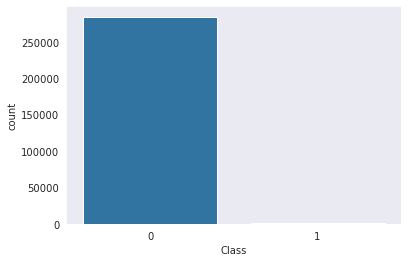

In [29]:
# Checar o balanceamento das classes
print(df_raw.Class.value_counts())
print('\nFraudes representam {:.4f}% do dataset.\n'.format((df_raw[df_raw.Class == 1].shape[0] / df_raw.shape[0]) * 100))

# Plotar gráfico de barras para as Classes
sns.countplot('Class', data=df_raw);

In [30]:
# Escolher e importa um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model_log = LogisticRegression()

# Fit do Modelo (Treinar)
model_log.fit(X_train, y_train)

# Fazer previsões em cima de novos dados 
y_pred_log = model_log.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9996    0.9998    0.9997     71079
           1     0.8932    0.7480    0.8142       123

    accuracy                         0.9994     71202
   macro avg     0.9464    0.8739    0.9069     71202
weighted avg     0.9994    0.9994    0.9994     71202

AUC: 0.8739



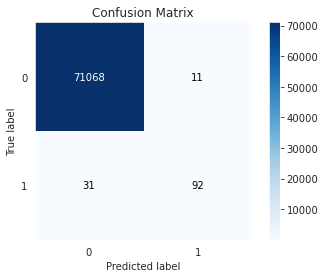

In [31]:
# Importar pacotes para avaliar o desempenho do modelo 
from sklearn.metrics import classification_report
import scikitplot as skplt

# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_log)

# Imprimir Relatório de Classificação
print('Relatório de Classificação:\n', classification_report(y_test, y_pred_log, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_log)))

In [32]:
# Escolher e instanciar os Hyperparameters
model_log_rus = LogisticRegression()

# Fit do modelo (Treinar)
model_log_rus.fit(X_rus, y_rus)

# Fazer previsões em cima de novos dados 
y_pred_rus = model_log_rus.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9731    0.9863     71079
           1     0.0562    0.9268    0.1060       123

    accuracy                         0.9730     71202
   macro avg     0.5281    0.9500    0.5462     71202
weighted avg     0.9982    0.9730    0.9848     71202

AUC: 0.9500



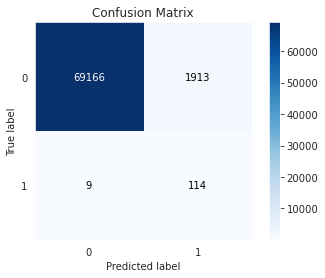

In [33]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_rus, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_rus)))

In [34]:

# Escolher e importar um modelo
from sklearn.linear_model import LogisticRegression

# Escolher e instanciar os Hyperparameters
model_log_smo = LogisticRegression()

# Fit do modelo (Treinar)
model_log_smo.fit(X_smo, y_smo)

# Fazer previsões em cima de novos dados 
y_pred_smo = model_log_smo.predict(X_test)

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9999    0.9749    0.9872     71079
           1     0.0605    0.9350    0.1137       123

    accuracy                         0.9748     71202
   macro avg     0.5302    0.9549    0.5505     71202
weighted avg     0.9983    0.9748    0.9857     71202

AUC: 0.9549



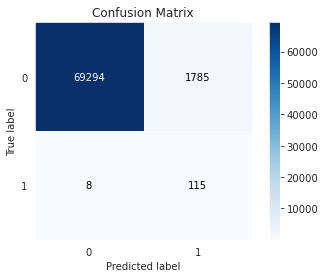

In [35]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_smo)

# Imprimir relatório de classificação
print('Relatório de Classificação:\n',classification_report(y_test, y_pred_smo, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_smo)))

In [36]:

# Escolher e plotar um modelo
model_log_ada = LogisticRegression()

# Fit do modelo (Treinar)
model_log_ada.fit(X_ada, y_ada)

# Fazer previsões em cima de novos dados 
y_pred_ada = model_log_ada.predict(X_test)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9144    0.9553     71079
           1     0.0190    0.9593    0.0373       123

    accuracy                         0.9145     71202
   macro avg     0.5095    0.9369    0.4963     71202
weighted avg     0.9982    0.9145    0.9537     71202

AUC: 0.9369



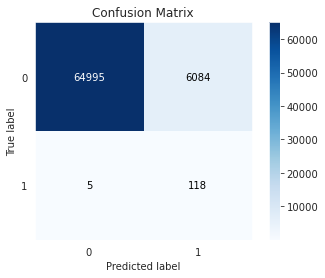

In [37]:

# Plotar a matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_ada)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_ada, digits=4))

# Imprimir a área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_ada)))

In [38]:

# Escolher e importar o modelo
from sklearn.tree import DecisionTreeClassifier

# Escolher os Hyperparameters
model_tree = DecisionTreeClassifier(max_depth=4, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree.fit(X_train, y_train)

# Fazer previsões em cima dos dados de teste
y_pred_tree = model_tree.predict(X_test)

              precision    recall  f1-score   support

           0     0.9997    0.9998    0.9997     71079
           1     0.8595    0.8455    0.8525       123

    accuracy                         0.9995     71202
   macro avg     0.9296    0.9226    0.9261     71202
weighted avg     0.9995    0.9995    0.9995     71202

AUC: 0.9226



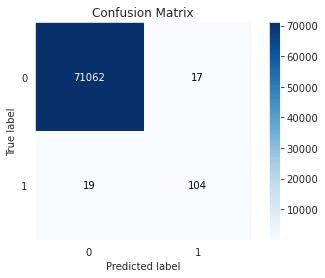

In [39]:

# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree)

# Imprimir classification report
print(classification_report(y_test, y_pred_tree, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree)))
     

In [40]:
# Escolher os hyperparameters 
model_tree_rus = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_rus.fit(X_rus, y_rus)

# Fazer previsões em cima dos dados de teste
y_pred_tree_rus = model_tree_rus.predict(X_test)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9042    0.9497     71079
           1     0.0168    0.9431    0.0329       123

    accuracy                         0.9043     71202
   macro avg     0.5083    0.9237    0.4913     71202
weighted avg     0.9982    0.9043    0.9481     71202

AUC: 0.9237



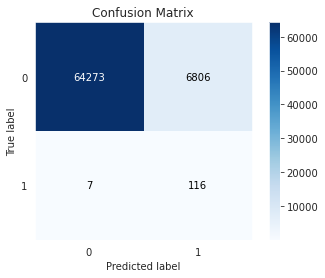

In [41]:
# Plotar matriz de confusão 
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_rus)

# Imprimir relatório de classificação
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_rus, digits=4))

# Imprimir a Área sob Curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_rus)))

In [42]:
# Escolher os Hyperparameters
model_tree_smo = DecisionTreeClassifier(max_depth=6, criterion='entropy')

# Fit do Modelo(Treinar)
model_tree_smo.fit(X_smo, y_smo)

# Fazer previsões em cima dos dados de teste
y_pred_tree_smo = model_tree_smo.predict(X_test)

Relatório de Classificação: 
               precision    recall  f1-score   support

           0     0.9998    0.9661    0.9827     71079
           1     0.0444    0.9106    0.0847       123

    accuracy                         0.9660     71202
   macro avg     0.5221    0.9383    0.5337     71202
weighted avg     0.9982    0.9660    0.9811     71202

AUC: 0.9383



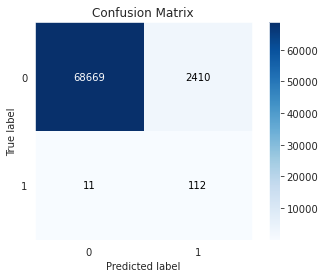

In [43]:
# Plotar matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_smo)

# Imprimir classification report
print('Relatório de Classificação: \n', classification_report(y_test, y_pred_tree_smo, digits=4))

# Imprimir área sob curva 
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test,y_pred_tree_smo)))

In [44]:

# Escolher os Hyperparameters
model_tree_ada = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Fit do Modelo (Treinar)
model_tree_ada.fit(X_ada, y_ada)

# Fazer previsões em cima dos dados de teste
y_pred_tree_ada = model_tree_ada.predict(X_test)

Relatório de classificação: 
               precision    recall  f1-score   support

           0     0.9999    0.9202    0.9584     71079
           1     0.0197    0.9268    0.0386       123

    accuracy                         0.9202     71202
   macro avg     0.5098    0.9235    0.4985     71202
weighted avg     0.9982    0.9202    0.9568     71202

AUC: 0.9235



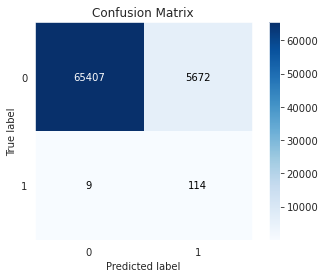

In [45]:

# Plotar Matriz de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred_tree_ada)

# Imprimir classification report
print('Relatório de classificação: \n', classification_report(y_test, y_pred_tree_ada, digits=4))

# Imprimir área sob curva
print('AUC: {:.4f}\n'.format(roc_auc_score(y_test, y_pred_tree_ada)))